<a href="https://colab.research.google.com/github/Moaz-Mahmoud-S/Data-analytics-/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

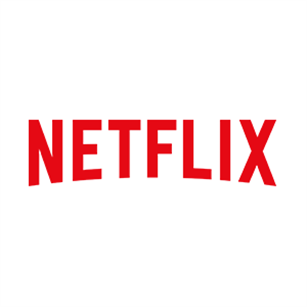

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/sample_data/file.csv")
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
data.shape

(7789, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


**1) checking the dublicates and remove them if exist**

In [8]:
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [10]:
data.drop_duplicates(inplace=True) # remove dublicates

In [11]:
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


**2) checking nulls**

In [13]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

using seaborn heatmap to express nulls in each column

<Axes: >

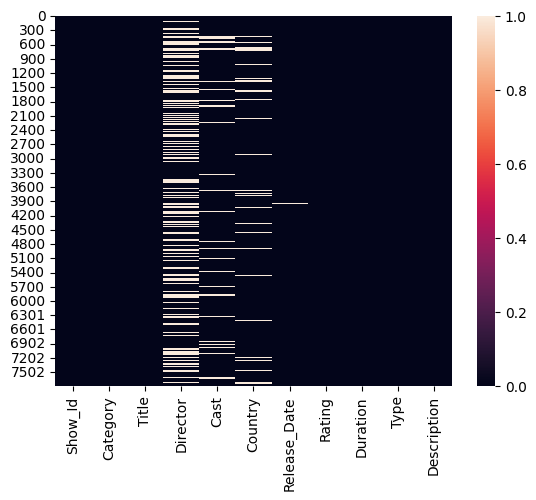

In [15]:
import seaborn as sns

sns.heatmap(data.isnull())

**Q1)for house of cards what is movie id and the director**

In [22]:
data[data['Title'].isin(["House of Cards"])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [25]:
data[data['Title'].str.contains("House of Cards")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


**Q2) in which year was the hieghst number of movies and shows was relesead**

In [28]:
data["Date_n"] = pd.to_datetime(data["Release_Date"])

In [30]:
data['Date_n'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Date_n, dtype: int64

<Axes: >

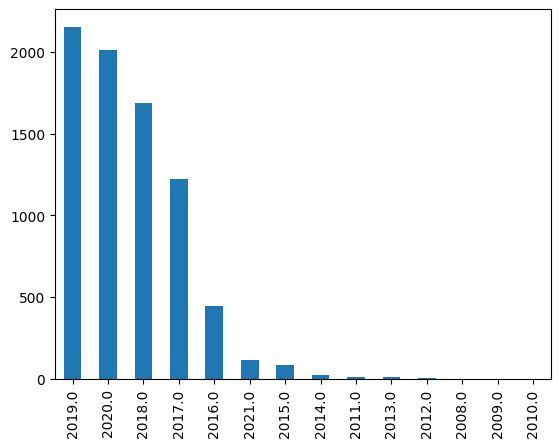

In [35]:
data['Date_n'].dt.year.value_counts().plot(kind="bar")

**Q3) How many movies and TV show in the dataset?**

<Axes: xlabel='Category'>

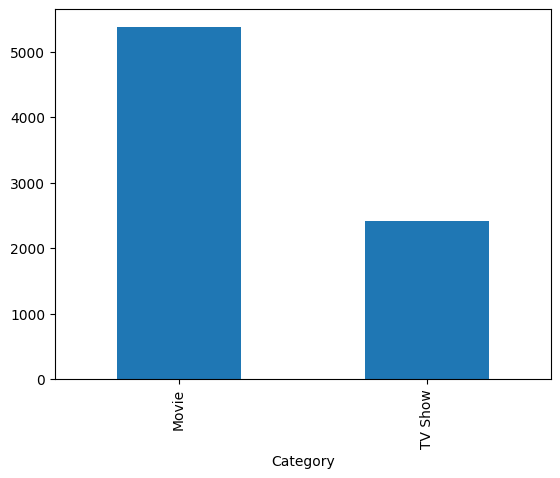

In [42]:
data.groupby(data["Category"]).count()["Show_Id"].plot(kind="bar")

**Q4) Show all movies released in 2020?**

In [47]:
data[(data["Date_n"].dt.year == 2020) & (data['Category'] == 'Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_n
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020-09-08
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7762,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,2020-05-19
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25


In [48]:
data['year']=data["Date_n"].dt.year

**Q5) Show all tvshows tittle released in Egypt?**

In [54]:
data[(data["Country"] == 'Egypt') & (data["Category"] == 'TV Show')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_n,year
1774,s1775,TV Show,Disappearance,NaN,"Nelly Karim, Mohamed Mamdouh, Hesham Selim",Egypt,"March 8, 2019",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A university lecturer in Russia returns to Egy...,2019-03-08,2019.0
2033,s2034,TV Show,Eugenie Nights,NaN,"Ameena Khalil, Zafer Abdeen, Injy El Mokkaddem...",Egypt,"March 11, 2019",TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","In 1940s Port Said, Kariman finds comfort and ...",2019-03-11,2019.0
2720,s2721,TV Show,Hidden Worlds,NaN,"Adel Imam, Salah Abdallah, Hiba Majdi, Bushra,...",Egypt,"February 5, 2019",TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",While investigating an actress’s supposed suic...,2019-02-05,2019.0
4225,s4226,TV Show,More to Say,NaN,"Yousra, Naglaa Badr, Sherine Reda, Ahmed Hatem...",Egypt,"March 13, 2019",TV-14,1 Season,"International TV Shows, TV Dramas, TV Mysteries","After her son dies in an accident, a legal con...",2019-03-13,2019.0
4630,s4631,TV Show,Once Upon a Time,NaN,"Ruby, Mohamed Farraag, Ahmed Dawood, Sawsan Ba...",Egypt,"December 9, 2020",TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Fighting to save his ancestors' mansion from d...,2020-12-09,2020.0
4766,s4767,TV Show,Paranormal,NaN,"Ahmed Amin, Razane Jammal, Ayah Samaha, Samaa ...",Egypt,"November 5, 2020",TV-14,1 Season,"International TV Shows, TV Dramas, TV Horror",After a skeptical hematologist is plunged into...,2020-11-05,2020.0
5464,s5464,TV Show,Secret of the Nile,NaN,"Amr Youssef, Dina El-Sherbiny, Anoushka, Amina...",Egypt,"March 15, 2018",TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",When his sister disappears while working at th...,2018-03-15,2018.0
5996,s5996,TV Show,Tayee,NaN,"Amr Youssef, Amr Abdel Guelil, Saba Mubarak",Egypt,"February 5, 2019",TV-MA,1 Season,"International TV Shows, TV Dramas",An Egyptian doctor becomes a police informant ...,2019-02-05,2019.0
6548,s6547,TV Show,The Land of Hypocrisy,NaN,"Mohamed Henedy, Dalal Abdel Aziz, Hana Shiha, ...",Egypt,"March 13, 2019",TV-14,1 Season,"International TV Shows, TV Comedies, TV Sci-Fi...",A hardworking man in a thankless job meets a m...,2019-03-13,2019.0
6568,s6567,TV Show,The Last of the Schmucks,NaN,"Chico, Ahmed Mekky, Hesham Maged, Bayoumi Foua...",Egypt,"February 7, 2019",TV-MA,1 Season,"International TV Shows, TV Comedies",The year is 2041 and a dispute between a man a...,2019-02-07,2019.0


**Q6) Show top 10 directors that give highest number of tvshows and movies?**

In [59]:
data["Director"].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

**Q7) Show all the movies and type comedies or country is uk?**

In [62]:
data[(data["Category"] == 'Movie') & (data["Type"].str.contains("Comedies")) & (data["Country"] == 'United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_n,year
287,s288,Movie,About Time,Richard Curtis,"Domhnall Gleeson, Rachel McAdams, Bill Nighy, ...",United Kingdom,"April 16, 2019",R,123 min,"Comedies, Dramas, International Movies",When Tim learns that the men in his family can...,2019-04-16,2019.0
445,s446,Movie,Amar Akbar & Tony,Atul Malhotra,"Rez Kempton, Sam Vincenti, Martin Delaney, Kar...",United Kingdom,"June 20, 2017",TV-MA,92 min,"Comedies, Dramas, International Movies",The brotherly bond between three childhood fri...,2017-06-20,2017.0
1091,s1092,Movie,Breaking the Bank,Vadim Jean,"Kelsey Grammer, Tamsin Greig, John Michael Hig...",United Kingdom,"January 1, 2020",TV-PG,105 min,"Comedies, International Movies",Bank chairman Charles Bunbury – who knows next...,2020-01-01,2020.0
1368,s1369,Movie,Christmas Survival,James Dearden,"Julian Ovenden, Gemma Whelan, Joely Richardson...",United Kingdom,"November 1, 2019",TV-MA,101 min,Comedies,"With Christmas just around the corner, sisters...",2019-11-01,2019.0
1650,s1651,Movie,Dead in a Week (Or Your Money Back),Tom Edmunds,"Tom Wilkinson, Aneurin Barnard, Freya Mavor, M...",United Kingdom,"March 1, 2019",TV-MA,90 min,Comedies,After several failed attempts at taking his ow...,2019-03-01,2019.0
2157,s2158,Movie,Figaro Pho,Luke Jurevicius,Luke Jurevicius,United Kingdom,"September 1, 2016",TV-Y7,29 min,"Children & Family Movies, Comedies",Quirky little Figaro has a whole alphabet's wo...,2016-09-01,2016.0
2189,s2190,Movie,Fisherman's Friends,Chris Foggin,"Daniel Mays, James Purefoy, David Hayman, Dave...",United Kingdom,"October 22, 2020",PG-13,112 min,"Comedies, Dramas, Music & Musicals",Sea shanties have long united 10 Cornish fishe...,2020-10-22,2020.0
2225,s2226,Movie,For Love or Money,Mark Murphy,"Robert Kazinsky, Samantha Barks, Ed Speleers, ...",United Kingdom,"August 16, 2019",TV-MA,95 min,Comedies,When a goofy but likable millionaire discovers...,2019-08-16,2019.0
2251,s2252,Movie,Four Weddings and a Funeral,Mike Newell,"Hugh Grant, Andie MacDowell, James Fleet, Simo...",United Kingdom,"August 1, 2019",R,118 min,"Classic Movies, Comedies, International Movies",A commitment-phobic Brit tries to reconnect wi...,2019-08-01,2019.0
2270,s2271,Movie,Free Fire,Ben Wheatley,"Sharlto Copley, Armie Hammer, Brie Larson, Cil...",United Kingdom,"October 21, 2019",R,91 min,"Action & Adventure, Comedies, Independent Movies",A sketchy arms transaction in a deserted wareh...,2019-10-21,2019.0


**Q8) how many movies / tv shows tom crus was cast?**

In [73]:
new_data = data.copy()

In [76]:
new_data.dropna(inplace=True)

In [77]:
new_data[new_data['Cast'].str.contains("Tom Cruise")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_n,year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


**Q9) Diffrenet ratings defined by netflix?**

In [79]:
data["Rating"].nunique()

14

q9.1) Rating TV-14 and canda?

In [81]:
data[(data["Rating"] == "TV-14") & (data["Country"] == "Canada")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_n,year
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020-02-05,2020.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10,2019.0
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,"December 27, 2018",TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018-12-27,2018.0
791,s792,TV Show,Beauty & the Beast,NaN,"Kristin Kreuk, Jay Ryan, Max Brown, Austin Bas...",Canada,"September 19, 2016",TV-14,4 Seasons,"Crime TV Shows, Romantic TV Shows, TV Dramas",A homicide detective and a veteran who has bee...,2016-09-19,2016.0
862,s863,TV Show,Between,NaN,"Jennette McCurdy, Jesse Carere, Ryan Allen, Ju...",Canada,"July 1, 2016",TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",After a mysterious disease kills every residen...,2016-07-01,2016.0
994,s995,TV Show,Blown Away,NaN,NaN,Canada,"July 12, 2019",TV-14,1 Season,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...,2019-07-12,2019.0
1047,s1048,TV Show,Border Security: America's Front Line,NaN,NaN,Canada,"January 1, 2020",TV-14,1 Season,"Crime TV Shows, International TV Shows, Realit...",This reality series chronicles the behind-the-...,2020-01-01,2020.0
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,"July 1, 2018",TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018-07-01,2018.0
1687,s1688,TV Show,Degrassi: Next Class,Stefan Brogren,"Amanda Arcuri, Amir Bageria, Soma Bhatia, Jami...",Canada,"July 7, 2017",TV-14,4 Seasons,"International TV Shows, TV Dramas, Teen TV Shows",Degrassi's next generation of high-tech newbie...,2017-07-07,2017.0
2678,s2679,TV Show,Heartland,NaN,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,"August 1, 2019",TV-14,11 Seasons,TV Dramas,Spunky teenager Amy is reeling from the sudden...,2019-08-01,2019.0


q9.2) Rating R and year > 2018?

In [83]:
data[(data["Rating"] == "R") & (data["year"] > 2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_n,year
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020.0
65,s66,Movie,13 Sins,Daniel Stamm,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",United States,"January 13, 2019",R,93 min,"Horror Movies, Thrillers",A man agrees to appear on a game show with a $...,2019-01-13,2019.0
68,s69,Movie,14 Blades,Daniel Lee,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...","Hong Kong, China, Singapore","April 3, 2019",R,113 min,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",2019-04-03,2019.0
83,s84,Movie,20th Century Women,Mike Mills,"Annette Bening, Elle Fanning, Greta Gerwig, Lu...",United States,"June 28, 2019",R,119 min,"Dramas, Independent Movies","In 1979, single bohemian mom Dorothea, hoping ...",2019-06-28,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7659,s7658,Movie,Woodshock,"Kate Mulleavy, Laura Mulleavy","Kirsten Dunst, Joe Cole, Pilou Asbæk, Jack Kil...",United States,"June 21, 2020",R,101 min,"Dramas, Independent Movies, Thrillers","Shattered after her mother's death, a woman fl...",2020-06-21,2020.0
7712,s7711,Movie,"Yes, God, Yes",Karen Maine,"Natalia Dyer, Timothy Simons, Wolfgang Novogra...",United States,"October 22, 2020",R,78 min,"Comedies, Dramas, Independent Movies",A devoutly religious teen grapples with her ow...,2020-10-22,2020.0
7738,s7737,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,2019-11-20,2019.0
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,2019.0


**Q10) Max Duration of movie/show on netflix?**

In [96]:
data[["Minutes","unites"]] = data["Duration"].str.split(" ",expand=True)
data

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_n,year,Minutes,unites
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,2020.0,99,min
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,2019.0,111,min
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,2020.0,44,min
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,2020.0,1,Season


In [100]:
data["Minutes"]=data["Minutes"].astype('int')

In [101]:
data["Minutes"].max()

312

**Q11) which country has the max tvshows?**

In [112]:
 data[data['Category'] == "TV Show"]["Country"].value_counts().head(10)

United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Taiwan             68
Canada             59
France             46
Australia          46
Spain              45
Name: Country, dtype: int64

**Q12)**
**Find all when category is movie and type is drama**

*or*

**category is tv show and type is kid's tv**

In [115]:
data[((data["Category"]=="Movie") & (data["Type"].str.contains("Drama"))) | ((data["Category"]=="TV Show") & (data['Type'].str.contains("Kids'TV")))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_n,year,Minutes,unites
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0,119,min
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017-10-20,2017.0,103,min
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,"September 1, 2019",TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,2019-09-01,2019.0,149,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,2019.0,158,min
7778,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018-11-01,2018.0,104,min
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018-07-01,2018.0,94,min
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,2020.0,99,min
